In [16]:
from selenium import webdriver
driver=webdriver.Chrome()      #创建一个浏览器对象
url='http://www.ptpress.com.cn/search/books'
driver.get(url)

In [15]:
#  二.  定位、输入关键字网页元素
input_text_button = driver.find_element_by_id('searchVal')
input_text_button.send_keys('python')

#定位按钮，并点击
#app > div:nth-child(1) > div > div > div > button > i
click_button =driver.find_element_by_css_selector('#app > div:nth-child(1) > div > div > div > button > i')
click_button.click()

#  三.提取网页源代码
html = driver.page_source
#print(html)

# 四.转换网页源代码为BSoup对象
from bs4  import BeautifulSoup
#创建Bsoup对象
soup=BeautifulSoup(html,'html.parser')
#初始化BSoup对象
soup.prettify

#五、提取元素
child_url = soup.select('div.book_item > a')        #定位到所有class属性为book_item的div元素
print(child_url)
img_html = []
child_html = []
for i in range(len(child_url)):
    #print(child_url[0])
    child_html.append('https://www.ptpress.com.cn'+child_url[i].get('href')) #提取子网页的网址

    ####提取图片的超链接网址
    img = child_url[i].select('div > img')            
    img_html.append(img[0].get('src'))       
print(img_html)
#下载图片
import time
import requests
for j in range(len(img_html)):
   img_info = requests.get(img_html[j])
   time.sleep(2)      ###睡眠2秒钟
   with open (r'C:\Users\nswdwy_yu\Desktop\%d_pic.jpg'%j,'wb') as f:
       f.write(img_info.content)




ElementClickInterceptedException: Message: element click intercepted: Element <i class="icon iconfont icon-sousuo1"></i> is not clickable at point (726, 251). Other element would receive the click: <div class="ivu-spin-main">...</div>
  (Session info: chrome=75.0.3770.142)


In [7]:
#进入子网页
print(child_html)

driver_child = webdriver.Chrome()
driver_child.get(child_html[0])
html_info = driver.page_source


soup1 = BeautifulSoup(html_info,'html.parser')
#初始化BSoup对象
soup.prettify

title = soup1.select('div.info > p')
print(title)

['https://www.ptpress.com.cn/shopping/buy?bookId=135a1062-a661-475a-9fe5-ef9ad09b6cef', 'https://www.ptpress.com.cn/shopping/buy?bookId=15aa18f1-274b-4412-a68f-94bd38ed891d', 'https://www.ptpress.com.cn/shopping/buy?bookId=16ee6fc2-86bc-4ff2-a277-84502de997eb', 'https://www.ptpress.com.cn/shopping/buy?bookId=273d6183-4e74-4bb3-89e5-e7e63dd73196', 'https://www.ptpress.com.cn/shopping/buy?bookId=30a94531-96bb-46cb-aba2-5f72fd7566ec', 'https://www.ptpress.com.cn/shopping/buy?bookId=40edbc59-6ef0-431a-8b51-3533cf4ac460', 'https://www.ptpress.com.cn/shopping/buy?bookId=83977c09-61d2-4a95-af41-5f1f0988e70d', 'https://www.ptpress.com.cn/shopping/buy?bookId=bbb21044-be96-44ba-a19d-31215f556e8d', 'https://www.ptpress.com.cn/shopping/buy?bookId=cbe6c9cd-6bf0-41e5-9cb6-808b0bb0877c']
[]


In [10]:
'''
功能：用webdriver模拟浏览器，提取人邮的图书信息
函数化
'''

#导入库 
from selenium  import webdriver     ##导入库
import time
from bs4 import BeautifulSoup

###一、模拟浏览器
def url_def(url):
    driver = webdriver.Chrome()          ##创建一个浏览器对象
    driver.get(url)     ##用浏览器请求网页
    time.sleep(10)
    return driver


#二、定位输入关键字的网页元素，并输入关键字python
def html_def(driver):
    input_text_button = driver.find_element_by_id('searchVal')
    input_text_button.send_keys('python')
    time.sleep(3)
    #定位搜索按钮，并点击
    click_button = driver.find_element_by_css_selector('#app > div:nth-child(1) > div > div > div > button > i')
    click_button.click()
    time.sleep(10)
    #三、提取网页源代码
    html = driver.page_source
    return html

#四、转换网页源代码为BSoup对象
def soup_def(html):
    #创建BSoup对象
    soup = BeautifulSoup(html,'html.parser')
    #初始化BSoup对象
    soup.prettify
    return soup

#五、提取元素
def child_url_def(soup):
    child_url = soup.select('div.book_item > a')        #定位到所有class属性为book_item的div元素
    print(child_url)
    img_html = []
    child_html = []
    for i in range(len(child_url)):
        #print(child_url[0])
        child_html.append('https://www.ptpress.com.cn'+child_url[i].get('href')) #提取子网页的网址

        ####提取图片的超链接网址
        img = child_url[i].select('div > img')            
        img_html.append(img[0].get('src'))       
    #print(img_html)
    return child_html

#下载图片
#import time
#import requests
#for j in range(len(img_html)):
 #   img_info = requests.get(img_html[j])
 #   time.sleep(2)      ###睡眠2秒钟
 #   with open (r'C:\Users\op\Desktop\%d_pic.jpg'%j,'wb') as f:
 #       f.write(img_info.content)
#进入子网页


def child_soup(child_html):
    
    title_list = []   #存放书名
    author_list= []   #存放作者
    price_list = []   #存放价格
    counts_list= []   #存放库存
    pagenum_list=[]   #存放页数
    
    for i in range(2):
        driver_child = url_def(child_html[i])
    
        #driver_child = webdriver.Chrome()
        #driver_child.get(child_html[0])
        html_info = driver_child.page_source
        soup_child = BeautifulSoup(html_info,'html.parser')
        #初始化BSoup对象
        soup_child.prettify

        info = soup_child.select('div.info > p') #返回3个p节点
        title_list.append(info[0].get_text())   #书名是第一个p节点
        author_list.append(info[1].get_text())  #作者是第二个
        
        book_price=soup.child.select('span.print')
        price_list.append(book_price[0].get_text())  #提取价格
        
        book_count=soup_child.select('div.key_attr > p:nth-of-type(1) > dd')
        counts_list.append(book_count[0].get_text)  #获取库存
        
        book_page=soup_child.select('table.bookBaseInfo > tbody > tr:nth-of-type(3)')
        pagenum_list.append(book_count[0].get_text())
        
        info_list.extend([title_list,author_list,counts_list,author_list,pagenum_list])
        return info_list
        #         title_text = title[0].get_text()
#         book_price = soup_child.select('span.price')
#         price_text = book_price[0].get_text()
        
    return [title_text,price_text]
###主函数
if __name__ == '__main__':
    url = 'https://www.ptpress.com.cn/search/books '
    driver = url_def(url)
    html = html_def(driver)
    soup = soup_def(html)
    child_html = child_url_def(soup)
    info = child_soup(child_html)
    print(info)
    
    

[<a href="/shopping/buy?bookId=76eb275d-42ec-4a6a-b781-e00e5721daa7" target="_blank"><div class="book_img book_bg_6"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-51241-3/72jpg/51241_s300.jpg"/></div> <p>Python数据科学与机器学习 从入门到实践</p></a>, <a href="/shopping/buy?bookId=e7e6ad1b-5f3a-49f6-bcd4-4e2060985880" target="_blank"><div class="book_img book_bg_1"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-51154-6/72jpg/51154_s300.jpg"/></div> <p>深入理解Python特性</p></a>, <a href="/shopping/buy?bookId=7f23c687-f3d2-4dba-a963-ea4244e1a9c5" target="_blank"><div class="book_img book_bg_5"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-50338-1/72jpg/50338_s300.jpg"/></div> <p>Python算法详解</p></a>, <a href="/shopping/buy?bookId=5b17ab77-008a-47b2-b89b-bacc03d4c1bf" target="_blank"><div class="book_img book_bg_7"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-50943-7/72jpg/50943_s300.jpg"/></div> <p>编程的乐趣 用Python解算法谜题</p></a>, <a href="

AttributeError: 'NoneType' object has no attribute 'select'

In [15]:
'''
功能：用webdriver模拟浏览器，提取人邮的图书信息

'''

#导入库 
from selenium  import webdriver     ##导入库
import time
from bs4 import BeautifulSoup

###一、模拟浏览器
def url_def(url):
    driver = webdriver.Chrome()          ##创建一个浏览器对象
    driver.get(url)     ##用浏览器请求网页
    time.sleep(10)
    return driver


#二、定位输入关键字的网页元素，并输入关键字python
def html_def(driver):
    input_text_button = driver.find_element_by_id('searchVal')
    input_text_button.send_keys('python')
    time.sleep(3)
    #定位搜索按钮，并点击
    click_button = driver.find_element_by_css_selector('#app > div:nth-child(1) > div > div > div > button > i')
    click_button.click()
    time.sleep(10)
    #三、提取网页源代码
    html = driver.page_source
    return html

#四、转换网页源代码为BSoup对象
def soup_def(html):
    #创建BSoup对象
    soup = BeautifulSoup(html,'html.parser')
    #初始化BSoup对象
    soup.prettify
    return soup

#五、提取元素
def child_url_def(soup):
    child_url = soup.select('div.book_item > a')        #定位到所有class属性为book_item的div元素
    print(child_url)
    img_html = []
    child_html = []
    for i in range(len(child_url)):
        #print(child_url[0])
        child_html.append('https://www.ptpress.com.cn'+child_url[i].get('href')) #提取子网页的网址

        ####提取图片的超链接网址
        img = child_url[i].select('div > img')            
        img_html.append(img[0].get('src'))       
    #print(img_html)
    return child_html

#下载图片
#import time
#import requests
#for j in range(len(img_html)):
 #   img_info = requests.get(img_html[j])
 #   time.sleep(2)      ###睡眠2秒钟
 #   with open (r'C:\Users\op\Desktop\%d_pic.jpg'%j,'wb') as f:
 #       f.write(img_info.content)

#进入子网页


def child_soup(child_html):
    title_list = []     #存放书名
    author_list = []     #存放作者
    price_list = []      #存放价格
    count_list = []      #存放库存
    pagenum_list = []     #存放页数       
    
    info_list = []        #存放图书信息
    for i in range(len(child_html)):
        driver_child = url_def(child_html[i])
        html_info = driver_child.page_source
        soup_child = BeautifulSoup(html_info,'html.parser')
        #初始化BSoup对象
        soup_child.prettify
    
        info = soup_child.select('div.info > p')     #返回3个p节点
        title_list.append(info[0].get_text())    #书名在第1个p节点
        author_list.append(info[1].get_text())     #作者在第2个p节点
 
        book_price = soup_child.select('span.price')
        price_list.append(book_price[0].get_text())   #提取价格
        
        book_count = soup_child.select('#detail > div.detl-top.detail_fr.fr > div.key_attr > dl:nth-of-type(1) > dd')
        count_list.append(book_count[0].get_text())     #提取库存
        #detail > div.detl-top.detail_fr.fr > div.key_attr > dl:nth-of-type(2) > dd
        
        book_page = soup_child.select('#detail > div.book-detail-other > ul.tab-con > li.active > table > tbody > tr:nth-of-type(2) > td:nth-of-type(3) ')
        
    #detail > div.book-detail-other > ul.tab-con > li.active > table > tbody > tr:nth-of-type(2) > td:nth-of-type(3)    
        
        pagenum_list.append(book_page[0].get_text()[3:])
    info_list.extend([title_list,author_list,price_list,count_list,pagenum_list])   
    return info_list
###主函数
if __name__ == '__main__':
    url = 'https://www.ptpress.com.cn/search/books '
    driver = url_def(url)
    html = html_def(driver)
    soup = soup_def(html)
    child_html = child_url_def(soup)
    info = child_soup(child_html)
    print(info)
    
    

[<a href="/shopping/buy?bookId=76eb275d-42ec-4a6a-b781-e00e5721daa7" target="_blank"><div class="book_img book_bg_6"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-51241-3/72jpg/51241_s300.jpg"/></div> <p>Python数据科学与机器学习 从入门到实践</p></a>, <a href="/shopping/buy?bookId=e7e6ad1b-5f3a-49f6-bcd4-4e2060985880" target="_blank"><div class="book_img book_bg_4"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-51154-6/72jpg/51154_s300.jpg"/></div> <p>深入理解Python特性</p></a>, <a href="/shopping/buy?bookId=7f23c687-f3d2-4dba-a963-ea4244e1a9c5" target="_blank"><div class="book_img book_bg_5"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-50338-1/72jpg/50338_s300.jpg"/></div> <p>Python算法详解</p></a>, <a href="/shopping/buy?bookId=5b17ab77-008a-47b2-b89b-bacc03d4c1bf" target="_blank"><div class="book_img book_bg_6"><img src="http://47.93.163.221:8084/uploadimg/Material/978-7-115-50943-7/72jpg/50943_s300.jpg"/></div> <p>编程的乐趣 用Python解算法谜题</p></a>, <a href="

In [20]:
import pandas as pd
import numpy as np

arr1=np.array(info)
print(arr1)
print(arr1.shape)   #np中数组的特点：类型必须一致

dict={}
dict['book_name']=info[0]
dict['book_author']=info[1]

for i in range(9):
    info[2][i]=float(info[2][i])    #将价格变为浮点型
    info[3][i]=int(info[3][i])
    info[4][i]=int(info[4][i])
    
dict['book_price']=info[2]
dict['book_count']=info[3]
dict['book_page']=info[4]

book_df=pd.DataFrame(dict_book)
book_df
print(book_df.dtypes)

[['Python数据科学与机器学习 从入门到实践' '深入理解Python特性' 'Python算法详解'
  '编程的乐趣 用Python解算法谜题' '青少年Python编程入门' 'Python网络爬虫权威指南 第2版'
  'Python 3破冰人工智能 从入门到实战' '从零开始学Python 第2版' 'Python网络爬虫技术']
 ['[美]弗兰克·凯恩（Frank Kane）' '[德]达恩·巴德尔（Dan Bader）' '张玲玲'
  '[美] 斯里尼·德瓦达斯（Srini Devadas）' '左利鑫 史卫亚' '[美] 瑞安·米切尔（Ryan Mitchell）'
  '黄海涛' '[美] 约翰·保罗·穆勒（John Paul Mueller）' '江吉彬 张良均']
 ['55.2' '39.2' '55.2' '47.2' '36.0' '63.2' '47.2' '55.2' '31.84']
 ['2123' '1655' '619' '695' '1067' '575' '1084' '664' '2292']
 ['273' '163' '350' '223' '242' '241' '229' '311' '165']]
(5, 9)
book_author     object
book_count       int64
book_name       object
book_page        int64
book_price     float64
dtype: object


In [21]:
book_df

,book_author,book_count,book_name,book_page,book_price
0,[美]弗兰克·凯恩（Frank Kane）,2123,Python数据科学与机器学习 从入门到实践,273,55.20
1,[德]达恩·巴德尔（Dan Bader）,1655,深入理解Python特性,163,39.20
2,张玲玲,619,Python算法详解,350,55.20
3,[美] 斯里尼·德瓦达斯（Srini Devadas）,695,编程的乐趣 用Python解算法谜题,223,47.20
4,左利鑫 史卫亚,1067,青少年Python编程入门,242,36.00
5,[美] 瑞安·米切尔（Ryan Mitchell）,575,Python网络爬虫权威指南 第2版,241,63.20
6,黄海涛,1084,Python 3破冰人工智能 从入门到实战,229,47.20
7,[美] 约翰·保罗·穆勒（John Paul Mueller）,664,从零开始学Python 第2版,311,55.20
8,江吉彬 张良均,2292,Python网络爬虫技术,165,31.84


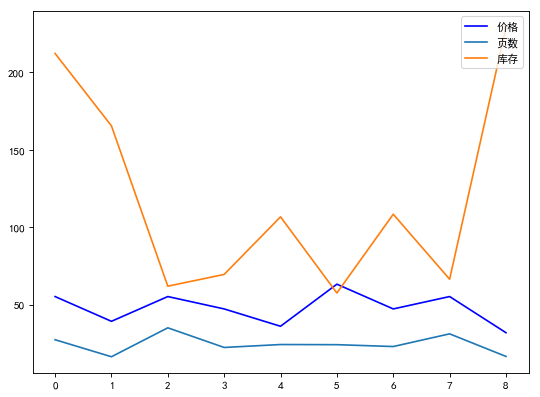

In [34]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

#画图--用折线图展示
plt.figure(figsize=(8,6),dpi = 80)
l1 = [i for i in range(9)]
#plt.xticks(l1,book_df['book_name'],rotation=45)
plt.plot(l1,book_df['book_price'],color = 'b')
plt.plot(l1,book_df['book_page']/10)
plt.plot(l1,book_df['book_count']/10)


plt.legend(['价格','页数','库存'],loc=1)
plt.show()

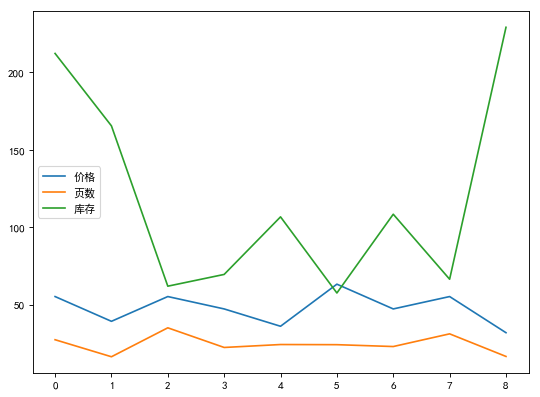

In [33]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

#折线图
plt.figure(figsize=(8,6),dpi=80)
l1=[i for i in range(len(child_html))]
plt.plot(l1,book_df['book_price'])
plt.plot(l1,book_df['book_page']/10)
plt.plot(l1,book_df['book_count']/10)
plt.legend(['价格','页数','库存'])
plt.show()
